In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/machine learning/first inten project.csv")

In [ ]:
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
null_values = data.isnull().sum()
print("Null Values in each column:\n", null_values)

Null Values in each column:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [ ]:
data_types = data.dtypes
print("\nData Types of each column:\n", data_types)


Data Types of each column:
 Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [ ]:
# Check for White Spaces and Clean Data
# Remove leading/trailing white spaces from string columns
df = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check for any remaining white spaces
white_spaces = data.applymap(lambda x: isinstance(x, str) and x.isspace()).sum()
print("\nColumns with only white spaces:\n", white_spaces)

# Display first few rows of the cleaned data
print("\nFirst few rows of the cleaned data:\n", df.head())


Columns with only white spaces:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

First few rows of the cleaned data:
   Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   I

In [ ]:
#outliers
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:\n", numeric_cols)

Numeric columns:
 Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests'],
      dtype='object')


In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
# Remove outliers using IQR method
data_iqr = remove_outliers_iqr(data.copy(), numeric_cols)
print("Data shape after IQR outlier removal:", data_iqr.shape)

Data shape after IQR outlier removal: (21189, 17)


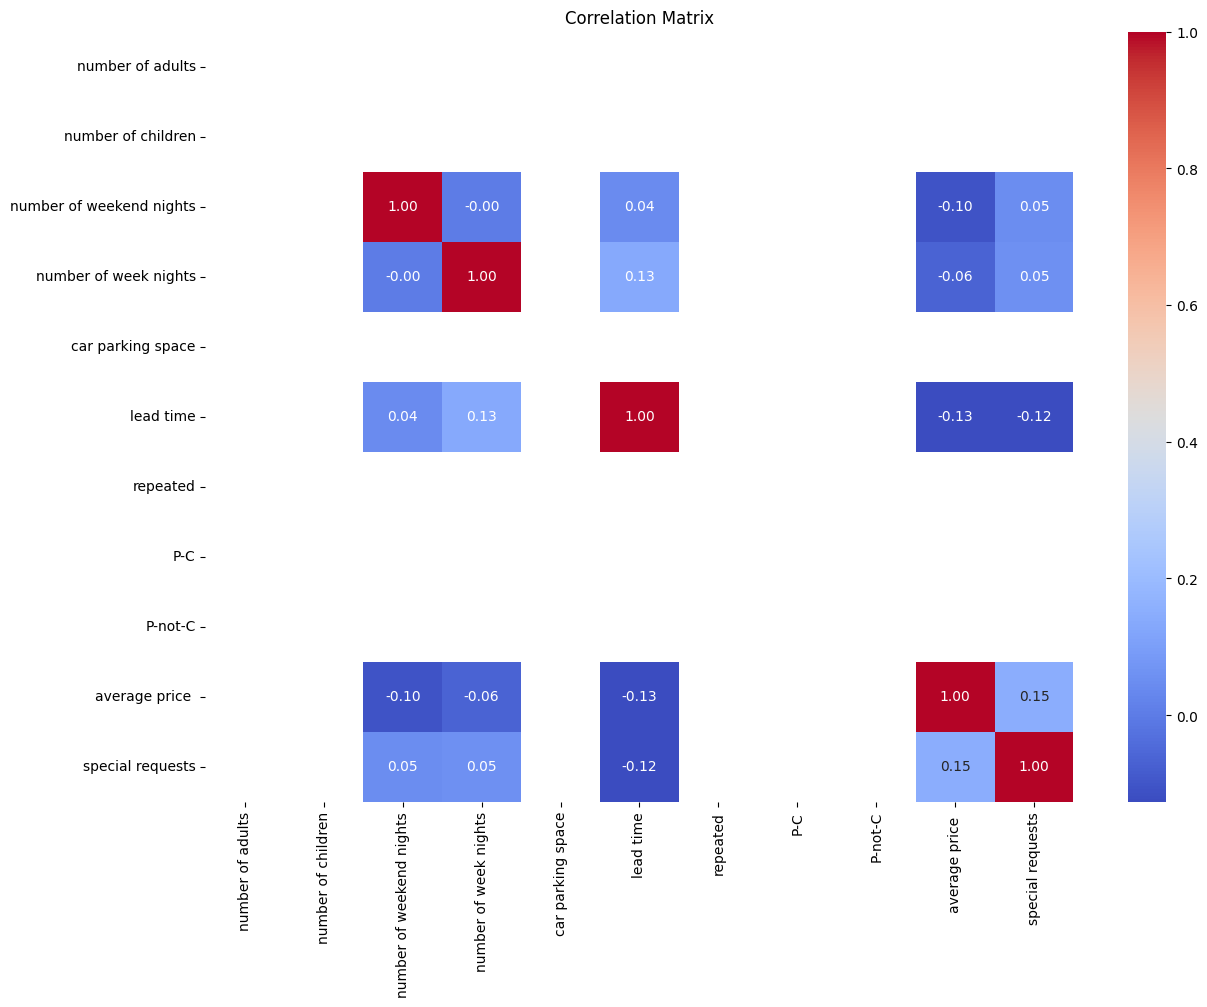

KeyError: 'booking status'

In [ ]:
#feature engineering
#droppping non numeric values
numeric_data = data_iqr.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Get the correlation of each feature with the target variable
target_corr = correlation_matrix['booking status'].sort_values(ascending=False)
print("Correlation with booking status:\n", target_corr)

# Selecting features with high correlation with the target variable
selected_features = target_corr[abs(target_corr) > 0.1].index.tolist()
#selected_features.remove('booking status')  # Remove the target variable itself
print("Selected features based on correlation:\n", selected_features)

# # Extract year, month, and day from 'date of reservation'
# data_iqr['reservation_year'] = data_iqr['date of reservation'].dt.year
# data_iqr['reservation_month'] = data_iqr['date of reservation'].dt.month
# data_iqr['reservation_day'] = data_iqr['date of reservation'].dt.day

# Drop the original 'date of reservation' column
# data_iqr.drop(columns=['date of reservation'], inplace=True)

# Create a new feature: total number of people
data_iqr['total_people'] = data_iqr['number of adults'] + data_iqr['number of children']

# Display the first few rows to ensure the changes
print("\nFirst few rows after feature engineering:\n", data_iqr.head())

In [ ]:
# Convert 'date of reservation' to datetime format, handle errors by setting invalid parsing as NaT
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

# Check for any NaT values in the date column
invalid_dates = data[data['date of reservation'].isna()]
print(f"Invalid dates found: {len(invalid_dates)}")
print(invalid_dates)

# Drop rows with NaT in 'date of reservation'
data = data.dropna(subset=['date of reservation'])

# Display the first few rows to ensure the changes
print("\nFirst few rows after cleaning:\n", data.head())

Invalid dates found: 37
      Booking_ID  number of adults  number of children  \
2626    INN02627                 2                   0   
3677    INN03678                 1                   0   
5600    INN05601                 2                   0   
6343    INN06344                 1                   0   
7648    INN07649                 2                   1   
8000    INN08001                 2                   2   
8989    INN08990                 1                   0   
9153    INN09154                 2                   2   
9245    INN09246                 2                   0   
9664    INN09665                 1                   0   
9934    INN09935                 1                   0   
10593   INN10594                 2                   0   
10652   INN10653                 2                   0   
10747   INN10748                 2                   0   
11881   INN11882                 1                   0   
13958   INN13959                 1              

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['booking status'])  # Features
y = data['booking status']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (28998, 16) (28998,)
Test set shape: (7250, 16) (7250,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=200)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test data with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy with Best Hyperparameters: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [6]:
#feature selection to optimize accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(random_state=42, max_iter=200)

# Define the feature selection method
feature_selector = SelectKBest(f_classif)

# Create a pipeline
pipeline = Pipeline([
    ('feature_selection', feature_selector),
    ('logistic_regression', model)
])

# Define the hyperparameter grid
param_grid = {
    'feature_selection__k': [1, 2, 3, 4],  # Number of features to select
    'logistic_regression__penalty': ['l1', 'l2', 'elasticnet', None],
    'logistic_regression__C': [0.01, 0.1, 1, 10, 100],
    'logistic_regression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and features
best_params = grid_search.best_params_
print("Best Hyperparameters and Features:", best_params)

# Predict on the test data with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters and Feature Selection:", accuracy)


Best Hyperparameters and Features: {'feature_selection__k': 3, 'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'sag'}
Accuracy with Best Hyperparameters and Feature Selection: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

In [7]:
import pickle

# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Load the model from the file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict on the test data with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Calculate accuracy
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print("Accuracy with Loaded Model (Pickle):", accuracy_loaded)


Accuracy with Loaded Model (Pickle): 1.0


In [8]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_model.joblib')

# Load the model from the file
loaded_model = joblib.load('best_model.joblib')

# Predict on the test data with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Calculate accuracy
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print("Accuracy with Loaded Model (Joblib):", accuracy_loaded)


Accuracy with Loaded Model (Joblib): 1.0


In [2]:
pip install flask


In [9]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'best_model.joblib')


['best_model.joblib']

In [ ]:
from flask import Flask, request, jsonify, render_template
import joblib
import numpy as np

app = Flask(__name__)

# Load the trained model
model = joblib.load('best_model.joblib')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data from the form
        data = [float(x) for x in request.form.values()]
        features = [np.array(data)]

        # Predict using the loaded model
        prediction = model.predict(features)

        return render_template('index.html', prediction_text=f'Predicted class: {prediction[0]}')
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
